In [1]:
from BeamWaist_aux import *

The main available functions are:

- Main functions, used for fitting and analysis. These are the functions that are used to perform the analysis of the beam profile.
        --> profile_along_beam: Given a beam trace in both (R, phiN) and (R, Z) coordinates, this function follows the centre of the beam and
        gives the perpendicular profile of the beam at regularly spaced points in R.

        --> beam_width: Given the perpendicular profile of the beam at regularly spaced points in R, this function finds the width of the beam at each point in R,
        using multiple measures

        --> broadening_main: Given a list of locations, this function performs the analysis of the beam profile for each file (location) and saves the results in a file.

- Plotting functions, and postprocessing. These are functions that are used to plot the results of the analysis, and to perform additional checks on the data.

        --> plot_perp_profiles: Given a file containing the results of the beam profile analysis, this function plots the perpendicular profiles
          of the beams at a requested distance along the beam.

        --> check_fits: Given a file containing the results of the beam profile analysis, this function checks the fits of the beam profiles
          at a requested distance along the beam, to see if a gaussian fit is appropriate. (or Cauchy)

        --> broadening_over_distance: Given a file containing the results of the beam profile analysis, this function plots the broadening of the beam,
            as a function of the distance along the beam. Either absolute or relative broadening can be plotted.

        --> compare_gaussian_beams: Function to compare the (approximated) gaussian beam characteristics before and after the fluctuation layer.

Just to be very clear, this notebook in the current way is designed to handle XZ and angular files, both of which are in the same horizontal variable (X or R, just choose one!) and both arrays of equal length!

## Start of the usage

In [2]:
"""
locations = ['/home/devlamin/Documents/WKBeam_related/Cases_ran_before/TCV74310_1_nofluct/output',
             '/home/devlamin/Documents/WKBeam_related/Cases_ran_before/TCV74310_1_Chellai_copy/output',
             '/home/devlamin/Documents/WKBeam_related/Cases_ran_before/TCV74310_1_Lperp_fixed_gaussian_fluct/output']
random.shuffle(locations)

filename = 'L1_binned_XZ.hdf5'
anglename = 'L1_binned_angular.hdf5'
convention = 'TCV'


locations = ['/home/devlamin/Documents/WKBeam_related/Cases_ran_before/ITER_20_perc/NoFluct',
             '/home/devlamin/Documents/WKBeam_related/Cases_ran_before/ITER_20_perc/Fluct',]
filename = 'binned_XZ.hdf5'
anglename = 'binned_angular.hdf5'
convention = 'ITER'
"""

locations = ['/home/devlamin/Documents/WKBeam_related/WKBEAM_ED/Benchmark_JC_Analytical/Output_nofluct_S1.1',
             #'/home/devlamin/Documents/WKBeam_related/WKBEAM_ED/Benchmark_JC_Analytical/Output_fluct_S1.1/s0.4_Lf1_Delt0.1',
             '/home/devlamin/Documents/WKBeam_related/WKBEAM_ED/Benchmark_JC_Analytical/Output_fluct_S1.1/s0.4_Lf1_Delt0.2',
             #'/home/devlamin/Documents/WKBeam_related/WKBEAM_ED/Benchmark_JC_Analytical/Output_fluct_S1.1/s0.4_Lf5_Delt0.1',
             '/home/devlamin/Documents/WKBeam_related/WKBEAM_ED/Benchmark_JC_Analytical/Output_fluct_S1.1/s0.4_Lf5_Delt0.2',
             #'/home/devlamin/Documents/WKBeam_related/WKBEAM_ED/Benchmark_JC_Analytical/Output_fluct_S1.1/s0.4_Lf2_Delt0.1',
             '/home/devlamin/Documents/WKBeam_related/WKBEAM_ED/Benchmark_JC_Analytical/Output_fluct_S1.1/s0.4_Lf2_Delt0.2',
             ]

filename = 'L2_binned_XZ.hdf5'
anglename = 'L2_binned_angular.hdf5'
convention = 'TCV'

"""
locations = ['/home/devlamin/Documents/WKBeam_related/WKBEAM_ED/StandardCases/TCV74310_1/Output_nofluct',
             '/home/devlamin/Documents/WKBeam_related/WKBEAM_ED/StandardCases/TCV74310_1/Output_fluct',
             ]

filename = 'L4_binned_XZ.hdf5'
anglename = 'L4_binned_angular.hdf5'
convention = 'TCV'
"""

"\nlocations = ['/home/devlamin/Documents/WKBeam_related/WKBEAM_ED/StandardCases/TCV74310_1/Output_nofluct',\n             '/home/devlamin/Documents/WKBeam_related/WKBEAM_ED/StandardCases/TCV74310_1/Output_fluct',\n             ]\n\nfilename = 'L4_binned_XZ.hdf5'\nanglename = 'L4_binned_angular.hdf5'\nconvention = 'TCV'\n"

In [3]:
locations = ['/home/devlamin/Documents/WKBeam_related/WKBacca_dev_v1/WKBacca_cases/TCV72644/t_1.05/Output_nofluct',
             '/home/devlamin/Documents/WKBeam_related/WKBacca_dev_v1/WKBacca_cases/TCV72644/t_1.05/Output_fluct']
filename = 'L1_binned_XZ.hdf5'
anglename = 'L1_binned_angular.hdf5'
convention = 'TCV'

In [4]:
datfile = broadening_main(locations,
            filename, anglename, plotfigures=False, convention=convention)


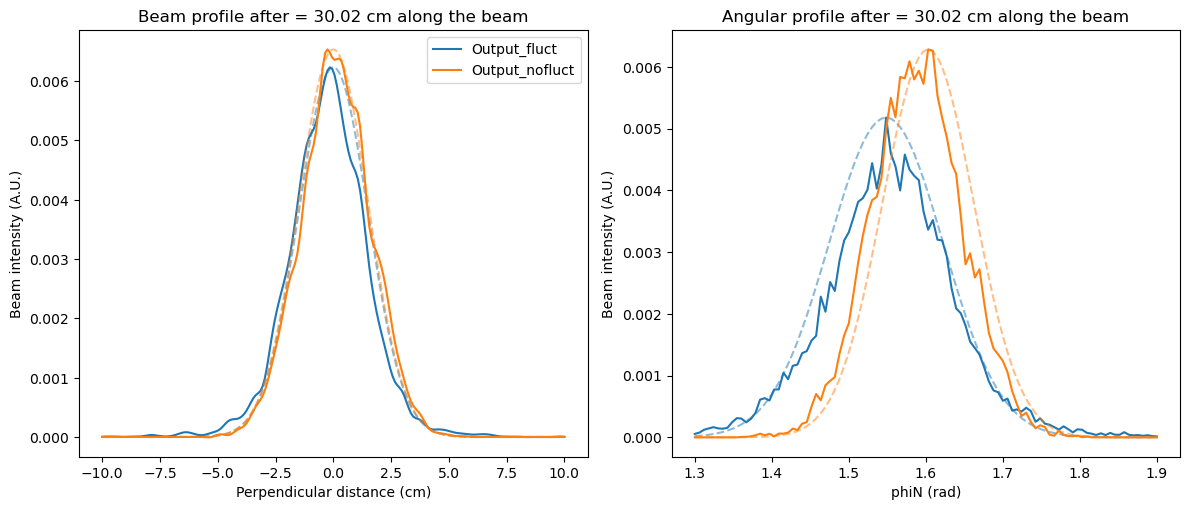

0

In [5]:
plot_perp_profiles(datfile, index=0)

## Proper beamwidth definitions

/home/devlamin/Documents/WKBeam_related/WKBacca_dev_v1/BeamWaist_aux.py:714: RuntimeWarning: invalid value encountered in divide
  ax3.scatter(distance, FWHM_angle/FWHM_angle_nofluct, color=color,  s=5, marker='x')
/home/devlamin/Documents/WKBeam_related/WKBacca_dev_v1/BeamWaist_aux.py:714: RuntimeWarning: divide by zero encountered in divide
  ax3.scatter(distance, FWHM_angle/FWHM_angle_nofluct, color=color,  s=5, marker='x')


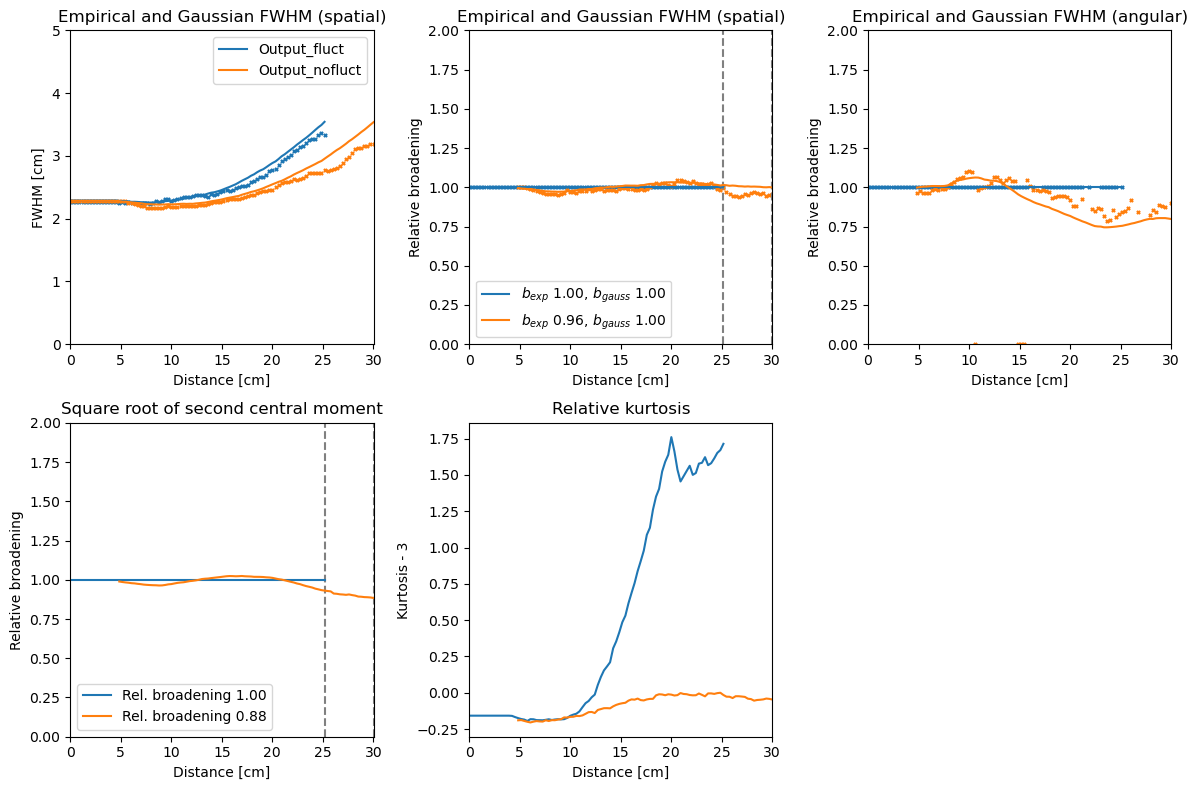

In [6]:
d, s = broadening_over_distance(datfile, plotindex=1, relative=True, absorption_position=30.)

In [7]:
len(d)

2

In [8]:
s_rel = s/s[0]

for i in range(len(d)):
    plt.plot(d[i], s_rel[i], label='Relative broadening')
    index_absoption = np.argmin(np.abs(d[0]-30))
    plt.annotate(f'Rel broadening {s_rel[i][index_absoption]:.2f}', (d[i][index_absoption], s_rel[i][index_absoption]), textcoords="offset points", xytext=(-60,10), ha='center')

plt.vlines(d[i][index_absoption], 1, s_rel[i][index_absoption], color='grey', label='Absorption position')
plt.hlines(1, 0, d[0][0], color='black')
plt.xlim(0, d[0][0])


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
check_fits(datfile, location_index=0, distance_index=0, fit_range=1)

So the broadening can be signiifcantly different based on your definition! Therefore, look at the full distribution and calculate the second moment.

**Some quick comments**:

We see that the standard deviation defined through the moment method is a good measure. It takes into account if a lot of power (even in relatively low levels) is in the tails. We see strongest deviations of these values from the stdev found from a gaussian fit for the profiles that were (naturally) least gaussian.

The kurtosis can help in that sense, in that it shows how strong the tails are. Normal distribution has kurtosis=3

From wikipedia:

This number is related to the tails of the distribution, not its peak;[2] hence, the sometimes-seen characterization of kurtosis as "peakedness" is incorrect. For this measure, higher kurtosis corresponds to greater extremity of deviations (or outliers), and not the configuration of data near the mean.

 Distributions with negative excess kurtosis are said to be platykurtic, although this does not imply the distribution is "flat-topped" as is sometimes stated. Rather, it means the distribution produces fewer and/or less extreme outliers than the normal distribution. An example of a platykurtic distribution is the uniform distribution, which does not produce outliers. Distributions with a positive excess kurtosis are said to be leptokurtic. An example of a leptokurtic distribution is the Laplace distribution, which has tails that asymptotically approach zero more slowly than a Gaussian, and therefore produces more outliers than the normal distribution. It is common practice to use excess kurtosis, which is defined as Pearson's kurtosis minus 3, to provide a simple comparison to the normal distribution.


## Absorption profiles



Reading data file /home/devlamin/Documents/WKBeam_related/WKBacca_dev_v1/WKBacca_cases/TCV72644/t_1.05/Output_nofluct/L1_binned_abs.hdf5

... processing data from: /home/devlamin/Documents/WKBeam_related/WKBacca_dev_v1/WKBacca_cases/TCV72644/t_1.05/Output_nofluct/L1_binned_abs.hdf5
    total absorbed power is 0.552MW
    grid size drho is 0.010
    volume calculation flag: COMPUTE
    label of the data set: Quiescent


 WARNING topfile: assuming psi = 1. at the separatrix. 

Computing dV_dpsi ... 



Reading data file /home/devlamin/Documents/WKBeam_related/WKBacca_dev_v1/WKBacca_cases/TCV72644/t_1.05/Output_fluct/L1_binned_abs.hdf5

... processing data from: /home/devlamin/Documents/WKBeam_related/WKBacca_dev_v1/WKBacca_cases/TCV72644/t_1.05/Output_fluct/L1_binned_abs.hdf5
    total absorbed power is 0.550MW
    grid size drho is 0.010
    volume calculation flag: COMPUTE
    label of the data set: Quiescent


 WARNING topfile: assuming psi = 1. at the separatrix. 

Computing dV_dps

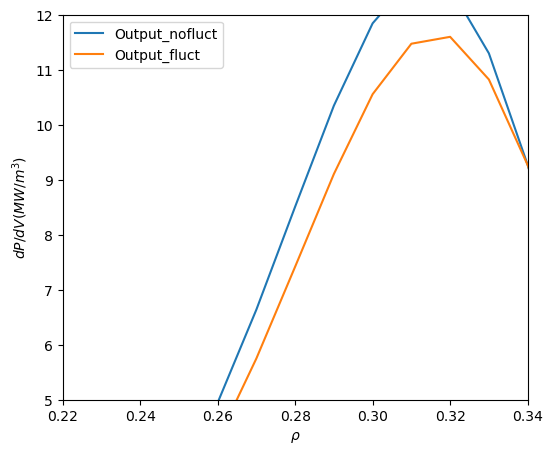

In [10]:
import Tools.PlotData.PlotAbsorptionProfile.plotabsprofile as PaP
from CommonModules.input_data import InputData

configFile = '/home/devlamin/Documents/WKBeam_related/WKBacca_dev_v1/WKBacca_cases/TCV72644/t_1.05/L1_abs.txt'

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)


for i, location in enumerate(locations):
    absFile = location + '/L1_binned_abs.hdf5'

    input_data = InputData(configFile)
    absorption = PaP.compute_deposition_profiles(input_data, inputfilename=absFile)

    ax.plot(absorption['rho'], absorption['dP_dV'][:, 0], label=location.split('/')[-1])

ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$dP/dV (MW/m^3)$')
ax.set_xlim(0.22, 0.34)
ax.set_ylim(5, 12)
ax.legend()
plt.show()


## Getting new curvature radius

It seems that even after the scattering layer has been passed, the beam is in many cases still close to a gaussian shape. It would therefore make sense to look at its diffraction, and try to figure out the new characteristics of the gaussian beam that penetrates further into the plasma. This might be tricky, as we are not propagating in a vacuum, but in a plasma. The gaussian beam teory might therefore not be entirely valid anymore.


The intensity goes as 

$ I(r,z) = I_0 (w_0/w(z))^2 exp(-2r^2/w(z)^2)$

So purely for the width part, we have the gaussian shape that has a changing standard deviation in the form of $w(z)^2/2$. So $w(z)$ is just double the standard deviation from earlier, or $w(z)=FWHM(z)/sqrt(2ln2)$. From a fit to this, we know $w(z)$, and thus the Rayleigh length, and thus the curvature radius! 

Another thing I track here, is a scatering parameter, which is a single number describing the difference in RMS electric field between a case and the vacuum case. Doing this at the end, so just before absorption.

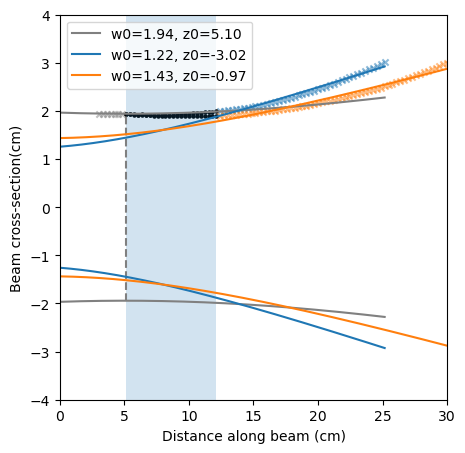

In [ ]:
w0_before, z0_before, w0_after, z0_after = compare_gaussian_beams(datfile, 5, 12, buffer=10, equalaspect=False)
